In [1]:
import sys
sys.path.append('../')
from src.medicalAppForecastor import medicalAppForecastor
from src.ModelCreator import ModelCreator
from src.DataPreprocess import DataPreprocessor
from src.FeatureExtractor import FeatureExtractor
import configparser

In [2]:
import logging 
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING)

In [3]:
config = configparser.ConfigParser()
config.read('../src/config.cfg')
mf = medicalAppForecastor(config)
fe = FeatureExtractor()
dp = DataPreprocessor()
mc = ModelCreator(config)

INFO:src.medicalAppForecastor:Init..
INFO:src.DataPreprocess:Data Preprocess Module Init..
INFO:src.FeatureExtractor:Feature Extractor Module Init..
INFO:src.ModelCreator:Model Creator Module Init..
INFO:src.FeatureExtractor:Feature Extractor Module Init..
INFO:src.DataPreprocess:Data Preprocess Module Init..
INFO:src.ModelCreator:Model Creator Module Init..


### Prepare Data

In [8]:
# Prepare data

df = mf.readData()
X, y = mf.prepareData(df)
X_train, X_test, y_train, y_test = mf.splitData(X, y)
X_train, y_train = fe.oversamplingData(X_train, y_train)    # surrogate the data for balancing 
X_train, X_test = dp.normalizeData(X_train.astype(float), X_test.astype(float))    # normalize the data
# X_train, X_test = dp.dimentionality_reduction(X_train, X_test)

INFO:root:Renaming columns..
INFO:root:Removing outlier data..
INFO:root:Add date based features...
INFO:root:Drop unused / non-informative features...
INFO:root:Change Age to categories...
INFO:root:Change Schedule Hour to categories...
INFO:root:Change Schedule Hour to categories...
INFO:root:Drop unused features...
INFO:root:Encoding columns..
DEBUG:root:Categorical column: Gender
DEBUG:root:Categorical column: Neighbourhood
DEBUG:root:Categorical column: Scholarship
DEBUG:root:Categorical column: Alcoholism
DEBUG:root:Categorical column: SMS_received
DEBUG:root:Categorical column: AppointmentDayOfWeek
DEBUG:root:Categorical column: ScheduledDayOfWeek
DEBUG:root:Categorical column: AgeBins
DEBUG:root:Categorical column: ScheduleHourBins
DEBUG:root:Categorical column: AppointmentHourBins
DEBUG:root:Encoded columns: ['Gender', 'Neighbourhood', 'Scholarship', 'Alcoholism', 'SMS_received', 'AppointmentDayOfWeek', 'ScheduledDayOfWeek', 'AgeBins', 'ScheduleHourBins', 'AppointmentHourBins'

### Grid Search on Data

In [10]:
# Grid search - LogisticRegression

tunedModelLR = mc.tuneModels(['LogisticReg'], X_train, y_train)

INFO:root:Start time: 12:37:12.
INFO:root:
 Model: LogisticReg 
 Params: {'solver': ['lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [1000]} 
INFO:root:Finish time: 12:41:31.
INFO:root:Run time: 259.75 seconds.
INFO:root:Best cross-validation accuracy: 0.7941
INFO:root:Best parameters: {'max_iter': 1000, 'solver': 'lbfgs'}


In [12]:
# Grid search - BernoulliNB

tunedModelBernoulliNB = mc.tuneModels(['BernoulliNB'], X_train, y_train)

INFO:root:Start time: 12:50:58.
INFO:root:
 Model: BernoulliNB 
 Params: {'alpha': [0.5, 1.0]} 
INFO:root:Finish time: 12:51:09.
INFO:root:Run time: 10.65 seconds.
INFO:root:Best cross-validation accuracy: 0.7903
INFO:root:Best parameters: {'alpha': 0.5}


In [8]:
# Grid search - Bagging

tunedModelBagging = mc.tuneModels(['Bagging'], X_train, y_train)

INFO:root:Start time: 11:02:53.
INFO:root:
 Model: Bagging 
 Params: {'n_estimators': [50, 100], 'max_samples': [0.5, 1.0]} 
INFO:root:Finish time: 12:32:45.
INFO:root:Run time: 5391.96 seconds.
INFO:root:Best cross-validation accuracy: 0.7964
INFO:root:Best parameters: {'max_samples': 0.5, 'n_estimators': 100}


In [6]:
# Grid search - Adaboost

tunedModelAdaboost = mc.tuneModels(['Adaboost'], X_train, y_train)

INFO:root:Start time: 10:48:01.
INFO:root:
 Model: Adaboost 
 Params: {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.3, 0.5, 1.0]} 
INFO:root:Finish time: 11:01:57.
INFO:root:Run time: 836.34 seconds.
INFO:root:Best cross-validation accuracy: 0.7973
INFO:root:Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [13]:
# Grid search - DecisionTree

tunedModelDecisionTree = mc.tuneModels(['DecisionTree'], X_train, y_train)

INFO:root:Start time: 13:01:20.
INFO:root:
 Model: DecisionTree 
 Params: {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, None]} 
INFO:root:Finish time: 13:02:53.
INFO:root:Run time: 92.74 seconds.
INFO:root:Best cross-validation accuracy: 0.7973
INFO:root:Best parameters: {'criterion': 'gini', 'max_depth': 2}


In [16]:
# Grid search - MLP

tunedModelMLP = mc.tuneModels(['MLP'], X_train, y_train)

INFO:root:Start time: 13:42:00.
INFO:root:
 Model: MLP 
 Params: {'hidden_layer_sizes': [(7, 2), (4, 3)], 'batch_size': [64, 200], 'max_iter': [300, 500]} 
INFO:root:Finish time: 14:25:28.
INFO:root:Run time: 2607.93 seconds.
INFO:root:Best cross-validation accuracy: 0.7974
INFO:root:Best parameters: {'batch_size': 64, 'hidden_layer_sizes': (4, 3), 'max_iter': 300}


In [5]:
# Grid search - ExtraTrees

tunedModelExtraTrees = mc.tuneModels(['ExtraTrees'], X_train, X_val, y_train

INFO:root:Start time: 17:42:25.
INFO:root:
 Model: ExtraTrees 
 Params: {'n_estimators': [10, 50], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, None]} 
INFO:root:Run time: 589.68 seconds.
INFO:root:Best cross-validation accuracy: 0.7966
INFO:root:Best parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 10}
INFO:root:Validate set score: 0.8004


In [ ]:
# Grid search - GradientBoosting

tunedModelGradientBoosting = mc.tuneModels(['GB'], X_train, y_train)

INFO:root:Start time: 17:22:06.
INFO:root:
 Model: GB 
 Params: {'learning_rate': [0.1, 0.5], 'n_estimators': [100, 300], 'max_depth': [3, 4]} 


In [4]:
# Grid search - RandomForest

tunedModelRandomForest = mc.tuneModels(['RandomForest'], X_train, y_train)

INFO:root:Start time: 23:08:09.
INFO:root:
 Model: RandomForest 
 Params: {'n_estimators': [10, 20], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 50, None]} 
INFO:root:Finish time: 23:15:44.
INFO:root:Run time: 455.25 seconds.
INFO:root:Best cross-validation accuracy: 0.7973
INFO:root:Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}


In [5]:
# Grid search - XGBoost

tunedModelXGBoost = mc.tuneModels(['XGBoost'], X_train, y_train,)

INFO:root:Start time: 12:08:17.
INFO:root:
 Model: XGBoost 
 Params: {'learning_rate': [0.1, 0.3, 1.0], 'max_depth': [3, 4, 5], 'n_estimators': [200, 300], 'gamma': [0.2], 'min_child_weight': [3]} 
INFO:root:Finish time: 14:55:11.
INFO:root:Run time: 10014.14 seconds.
INFO:root:Best cross-validation accuracy: 0.5712
INFO:root:Best parameters: {'gamma': 0.2, 'learning_rate': 1.0, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300}


In [ ]:
# Grid search - KNN

tunedModelKNN = mc.tuneModels(['KNN'], X_train, y_train)

INFO:root:Start time: 15:20:03.
INFO:root:
 Model: KNN 
 Params: {'n_neighbors': [5, 7], 'weights': ['uniform']} 


In [7]:
# get models with best parameters

tunedModels = mc.getTunedModels()    

In [5]:
# save tuned models to Models directory

mc.saveModels(tunedModels, './Models/', X_train, y_train)  

### Cross Validate the models

INFO:root:BernoulliNB Accuracy of model 0.7903155445688527: 
INFO:root:BernoulliNB ROC Accuracy of model 0.5159860182804811: 
INFO:root:BernoulliNB F1 Score of model 0.7220679058490035: 


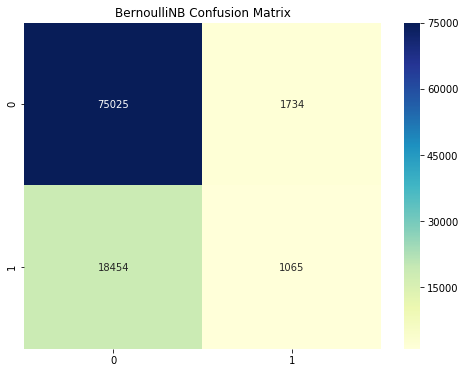

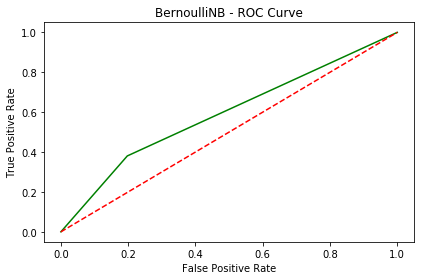

BernoulliNB - Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     76759
           1       0.38      0.05      0.10     19519

   micro avg       0.79      0.79      0.79     96278
   macro avg       0.59      0.52      0.49     96278
weighted avg       0.72      0.79      0.72     96278



INFO:root:LogisticReg Accuracy of model 0.7940962629053366: 
INFO:root:LogisticReg ROC Accuracy of model 0.5051383725416844: 
INFO:root:LogisticReg F1 Score of model 0.7127198615024999: 


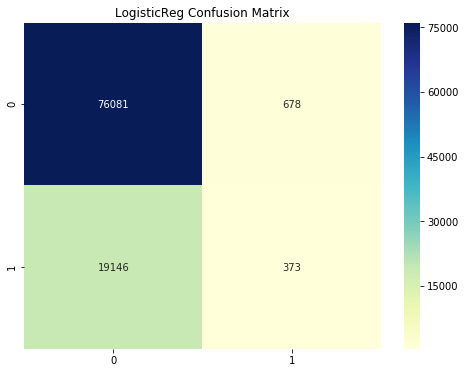

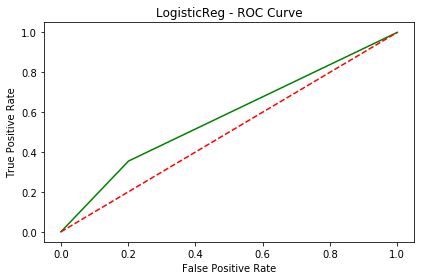

LogisticReg - Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     76759
           1       0.35      0.02      0.04     19519

   micro avg       0.79      0.79      0.79     96278
   macro avg       0.58      0.51      0.46     96278
weighted avg       0.71      0.79      0.71     96278



INFO:root:RandomForest Accuracy of model 0.7757120006647417: 
INFO:root:RandomForest ROC Accuracy of model 0.5644969411799017: 
INFO:root:RandomForest F1 Score of model 0.747149752057668: 


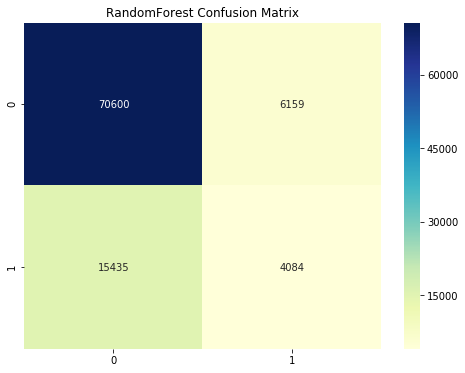

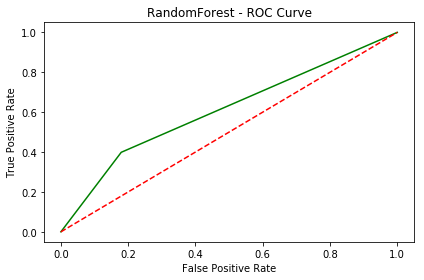

RandomForest - Classification Report 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     76759
           1       0.40      0.21      0.27     19519

   micro avg       0.78      0.78      0.78     96278
   macro avg       0.61      0.56      0.57     96278
weighted avg       0.74      0.78      0.75     96278



INFO:root:XGBoost Accuracy of model 0.7994765159226407: 
INFO:root:XGBoost ROC Accuracy of model 0.5182355753849037: 
INFO:root:XGBoost F1 Score of model 0.724480910662273: 


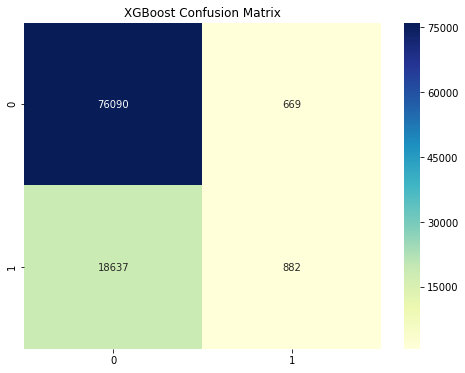

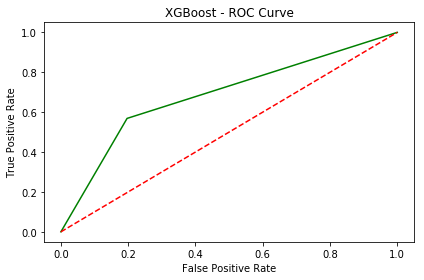

XGBoost - Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     76759
           1       0.57      0.05      0.08     19519

   micro avg       0.80      0.80      0.80     96278
   macro avg       0.69      0.52      0.49     96278
weighted avg       0.76      0.80      0.72     96278



INFO:root:MLP Accuracy of model 0.7963709258605289: 
INFO:root:MLP ROC Accuracy of model 0.502534357010513: 
INFO:root:MLP F1 Score of model 0.7100160488802368: 


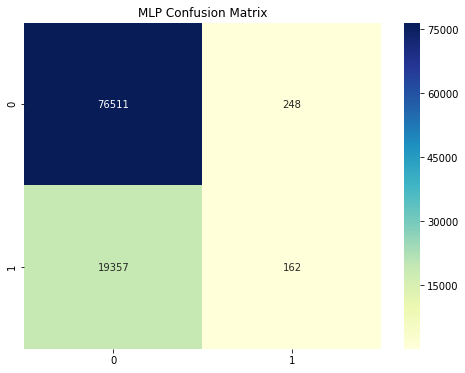

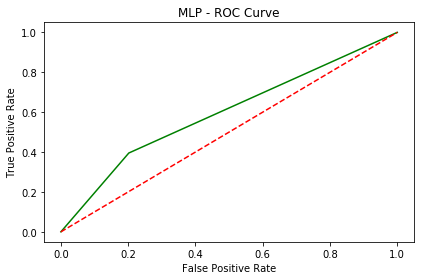

MLP - Classification Report 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     76759
           1       0.40      0.01      0.02     19519

   micro avg       0.80      0.80      0.80     96278
   macro avg       0.60      0.50      0.45     96278
weighted avg       0.72      0.80      0.71     96278



INFO:root:Adaboost Accuracy of model 0.7968487089470077: 
INFO:root:Adaboost ROC Accuracy of model 0.5050307459507528: 
INFO:root:Adaboost F1 Score of model 0.7124203208218123: 


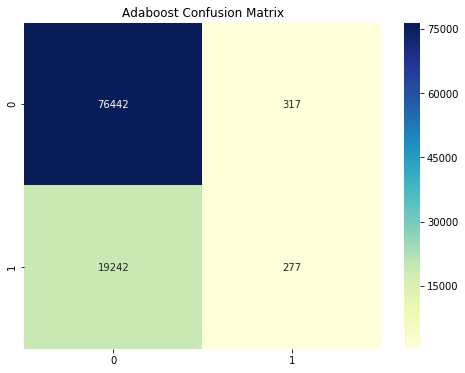

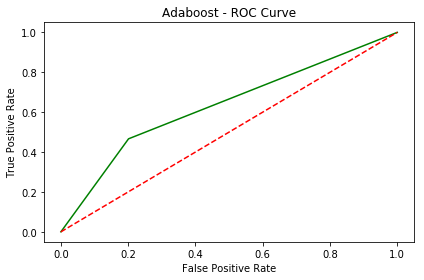

Adaboost - Classification Report 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     76759
           1       0.47      0.01      0.03     19519

   micro avg       0.80      0.80      0.80     96278
   macro avg       0.63      0.51      0.46     96278
weighted avg       0.73      0.80      0.71     96278



INFO:root:Bagging Accuracy of model 0.7820374332661667: 
INFO:root:Bagging ROC Accuracy of model 0.5675087940958103: 
INFO:root:Bagging F1 Score of model 0.751237903644012: 


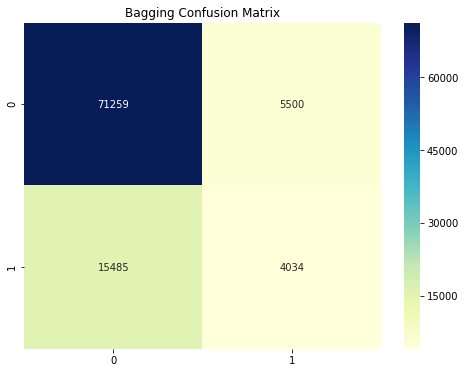

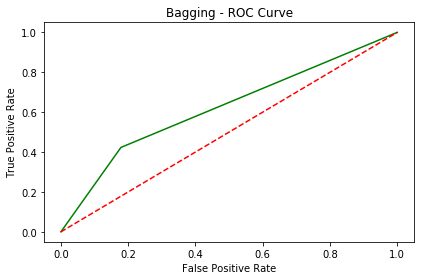

Bagging - Classification Report 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     76759
           1       0.42      0.21      0.28     19519

   micro avg       0.78      0.78      0.78     96278
   macro avg       0.62      0.57      0.57     96278
weighted avg       0.74      0.78      0.75     96278



INFO:root:GB Accuracy of model 0.7975757701655622: 
INFO:root:GB ROC Accuracy of model 0.5020101231888477: 
INFO:root:GB F1 Score of model 0.7093433336788074: 


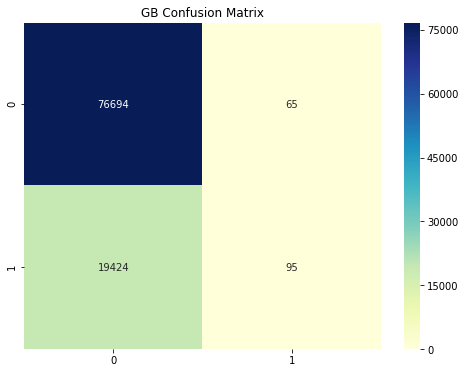

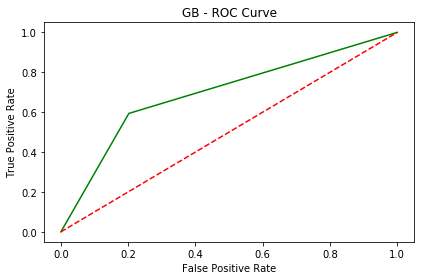

GB - Classification Report 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     76759
           1       0.59      0.00      0.01     19519

   micro avg       0.80      0.80      0.80     96278
   macro avg       0.70      0.50      0.45     96278
weighted avg       0.76      0.80      0.71     96278



INFO:root:DecisionTree Accuracy of model 0.7364714680404661: 
INFO:root:DecisionTree ROC Accuracy of model 0.5886934992593313: 
INFO:root:DecisionTree F1 Score of model 0.735480891892345: 


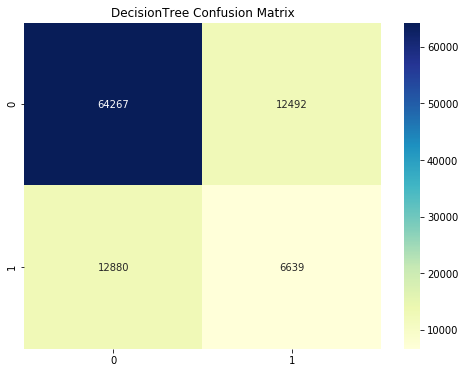

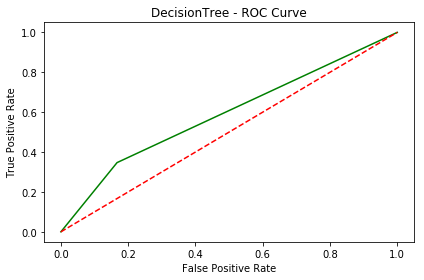

DecisionTree - Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     76759
           1       0.35      0.34      0.34     19519

   micro avg       0.74      0.74      0.74     96278
   macro avg       0.59      0.59      0.59     96278
weighted avg       0.73      0.74      0.74     96278



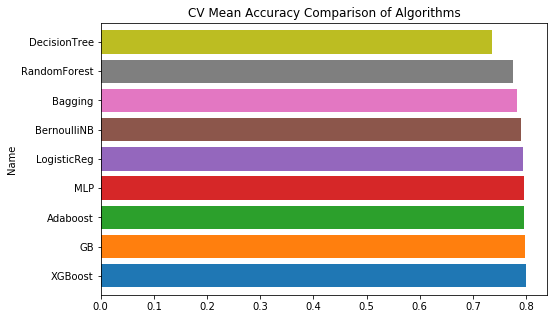

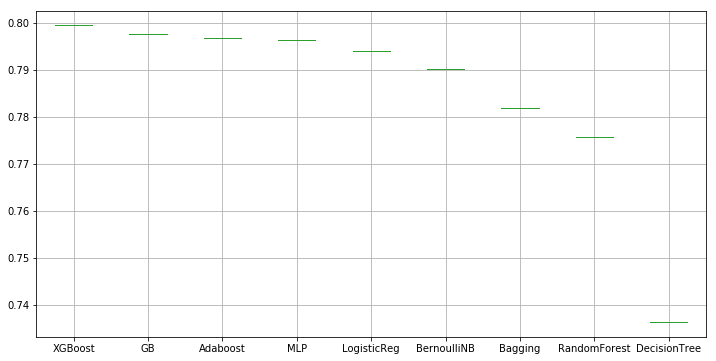

INFO:root:Best Model Based on CV: XGBoost with accuracy: 0.799


In [8]:
# cross validate models

cv_results = mc.crossValidateModels(tunedModels, X_train, y_train)

In [22]:
cv_results[0][0]

'XGBoost'

INFO:root:Getting XGBoost model results on test data: 
INFO:root:XGBoost Accuracy of model 0.8022060198167882: 
INFO:root:XGBoost ROC Accuracy of model 0.5211590009832159: 
INFO:root:XGBoost F1 Score of model 0.7283595017998815: 


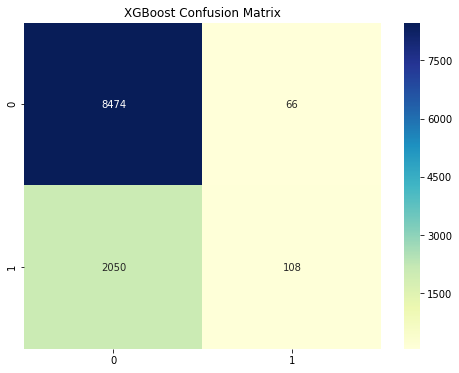

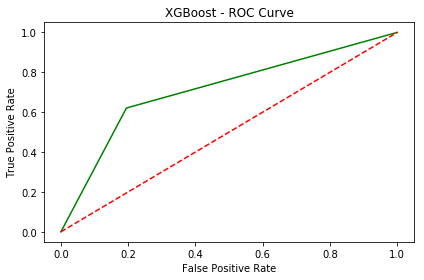

XGBoost - Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      8540
           1       0.62      0.05      0.09      2158

   micro avg       0.80      0.80      0.80     10698
   macro avg       0.71      0.52      0.49     10698
weighted avg       0.77      0.80      0.73     10698



In [13]:
best_model = cv_results[0][0]    # get best model based on cross validation score
mf.getModelResults(best_model, X_test, y_test)    # get best model scores on test set


In [10]:
# get best 3 models based on cross validation score

best3scorer = [(l[0], l[2]) for l in cv_results[:3]]


In [21]:
# get ensemble model results using best 3 models 

mc.ensembleModel(X, y, best3scorer)    # Soft Vote or weighted probabilities    

The cross validated score is 0.7924582838911195


VotingClassifier(estimators=[('XGBoost', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', ...thm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

Although the ensemble model's performance is not bad, it is not better than the best model's (XGBoost) performance which is 79.9.
So I will continue with XGBoost model. 

## Cross Validation Results After Oversampling the Data

INFO:root:BernoulliNB Accuracy of model 0.6640003126669185: 
INFO:root:BernoulliNB ROC Accuracy of model 0.6640003126669185: 
INFO:root:BernoulliNB F1 Score of model 0.663496529293562: 


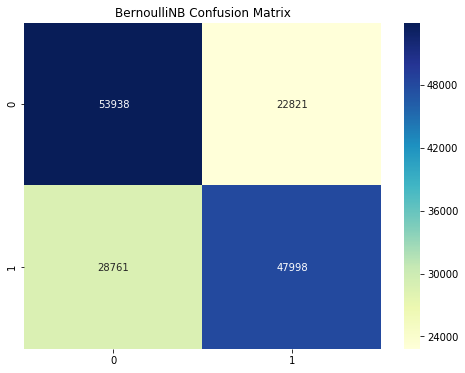

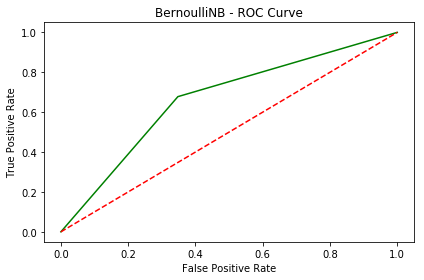

BernoulliNB - Classification Report 

              precision    recall  f1-score   support

           0       0.65      0.70      0.68     76759
           1       0.68      0.63      0.65     76759

   micro avg       0.66      0.66      0.66    153518
   macro avg       0.66      0.66      0.66    153518
weighted avg       0.66      0.66      0.66    153518



INFO:root:LogisticReg Accuracy of model 0.6371760966140778: 
INFO:root:LogisticReg ROC Accuracy of model 0.6371760966140779: 
INFO:root:LogisticReg F1 Score of model 0.636867955565033: 


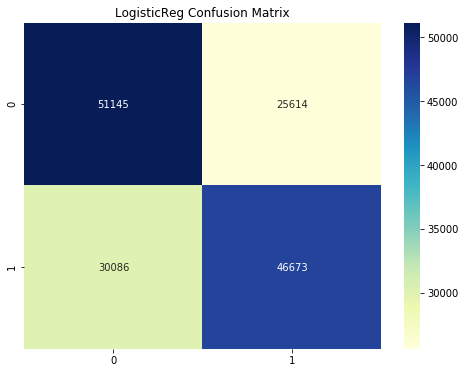

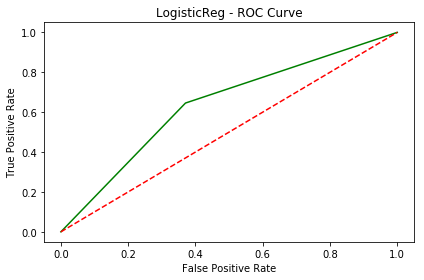

LogisticReg - Classification Report 

              precision    recall  f1-score   support

           0       0.63      0.67      0.65     76759
           1       0.65      0.61      0.63     76759

   micro avg       0.64      0.64      0.64    153518
   macro avg       0.64      0.64      0.64    153518
weighted avg       0.64      0.64      0.64    153518



INFO:root:RandomForest Accuracy of model 0.8517893667192121: 
INFO:root:RandomForest ROC Accuracy of model 0.8517893667192121: 
INFO:root:RandomForest F1 Score of model 0.8516693397870486: 


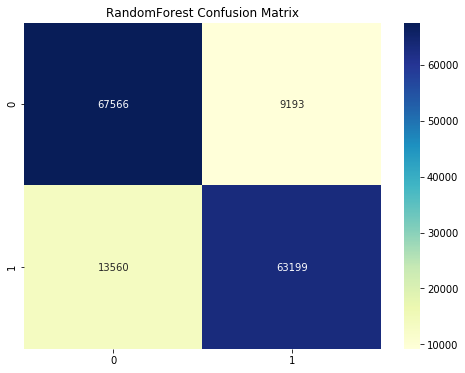

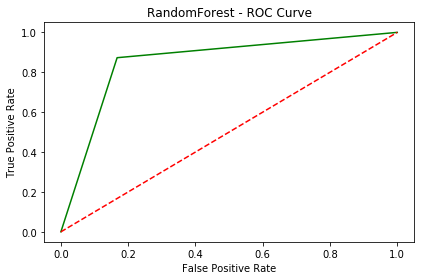

RandomForest - Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.88      0.86     76759
           1       0.87      0.82      0.85     76759

   micro avg       0.85      0.85      0.85    153518
   macro avg       0.85      0.85      0.85    153518
weighted avg       0.85      0.85      0.85    153518



INFO:root:XGBoost Accuracy of model 0.8469234877994762: 
INFO:root:XGBoost ROC Accuracy of model 0.8469234877994765: 
INFO:root:XGBoost F1 Score of model 0.8448574239737929: 


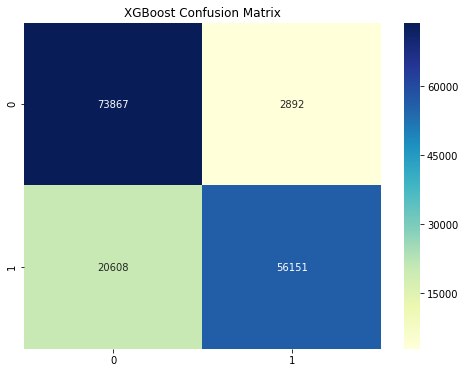

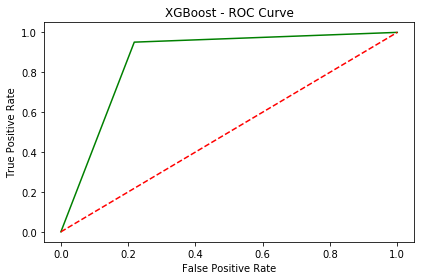

XGBoost - Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     76759
           1       0.95      0.73      0.83     76759

   micro avg       0.85      0.85      0.85    153518
   macro avg       0.87      0.85      0.84    153518
weighted avg       0.87      0.85      0.84    153518



INFO:root:MLP Accuracy of model 0.687736942899204: 
INFO:root:MLP ROC Accuracy of model 0.6877369428992041: 
INFO:root:MLP F1 Score of model 0.6871241630128465: 


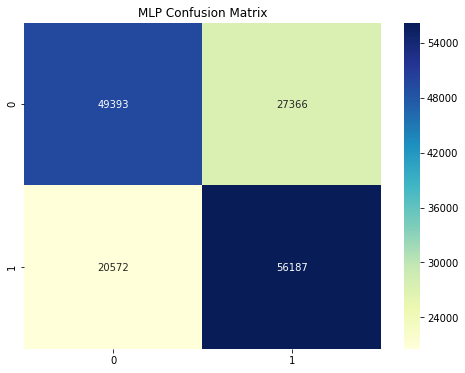

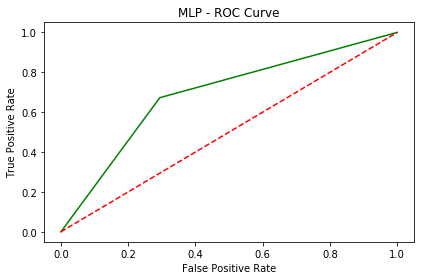

MLP - Classification Report 

              precision    recall  f1-score   support

           0       0.71      0.64      0.67     76759
           1       0.67      0.73      0.70     76759

   micro avg       0.69      0.69      0.69    153518
   macro avg       0.69      0.69      0.69    153518
weighted avg       0.69      0.69      0.69    153518



INFO:root:Adaboost Accuracy of model 0.720931747417241: 
INFO:root:Adaboost ROC Accuracy of model 0.720931747417241: 
INFO:root:Adaboost F1 Score of model 0.7193673742422667: 


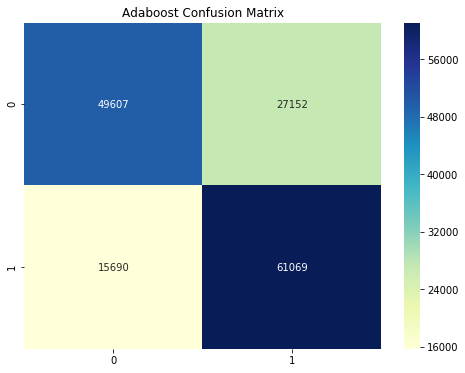

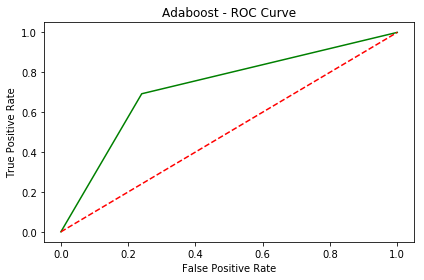

Adaboost - Classification Report 

              precision    recall  f1-score   support

           0       0.76      0.65      0.70     76759
           1       0.69      0.80      0.74     76759

   micro avg       0.72      0.72      0.72    153518
   macro avg       0.73      0.72      0.72    153518
weighted avg       0.73      0.72      0.72    153518



INFO:root:Bagging Accuracy of model 0.8574564546176996: 
INFO:root:Bagging ROC Accuracy of model 0.8574564546176996: 
INFO:root:Bagging F1 Score of model 0.8571957806312521: 


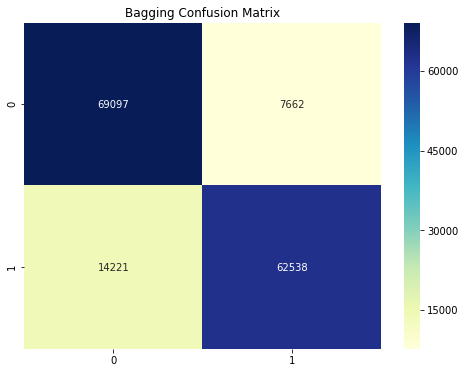

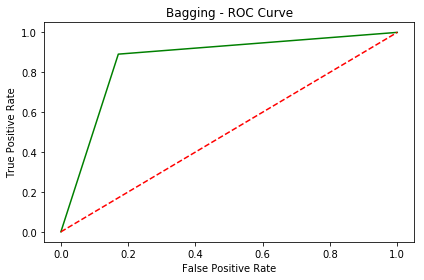

Bagging - Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     76759
           1       0.89      0.81      0.85     76759

   micro avg       0.86      0.86      0.86    153518
   macro avg       0.86      0.86      0.86    153518
weighted avg       0.86      0.86      0.86    153518



INFO:root:GB Accuracy of model 0.7602756679998437: 
INFO:root:GB ROC Accuracy of model 0.7602756679998437: 
INFO:root:GB F1 Score of model 0.7597759302864124: 


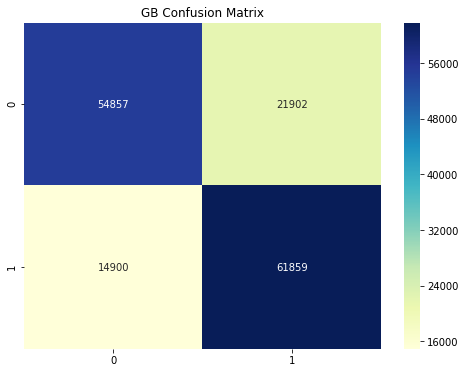

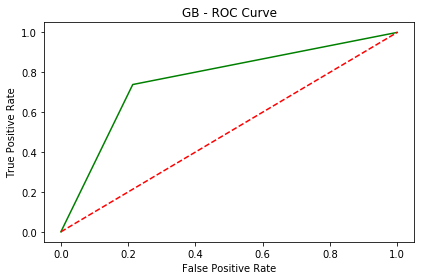

GB - Classification Report 

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     76759
           1       0.74      0.81      0.77     76759

   micro avg       0.76      0.76      0.76    153518
   macro avg       0.76      0.76      0.76    153518
weighted avg       0.76      0.76      0.76    153518



INFO:root:DecisionTree Accuracy of model 0.8293229458434842: 
INFO:root:DecisionTree ROC Accuracy of model 0.829322945843484: 
INFO:root:DecisionTree F1 Score of model 0.829321833006639: 


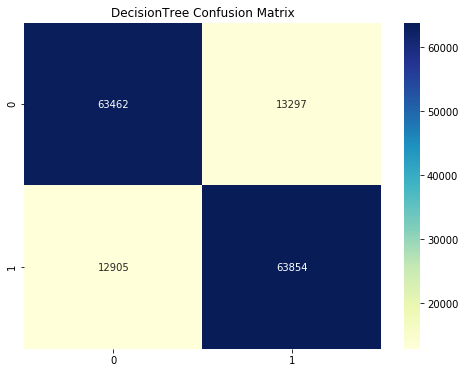

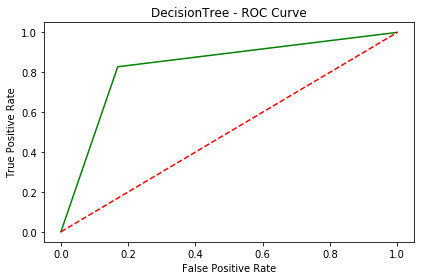

DecisionTree - Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     76759
           1       0.83      0.83      0.83     76759

   micro avg       0.83      0.83      0.83    153518
   macro avg       0.83      0.83      0.83    153518
weighted avg       0.83      0.83      0.83    153518



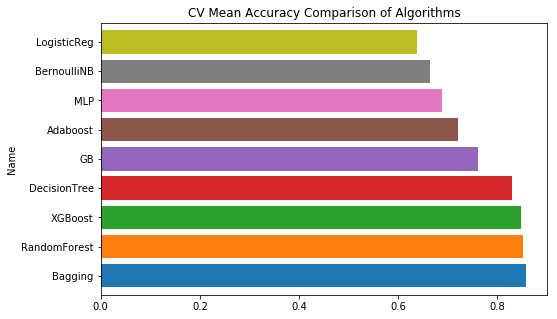

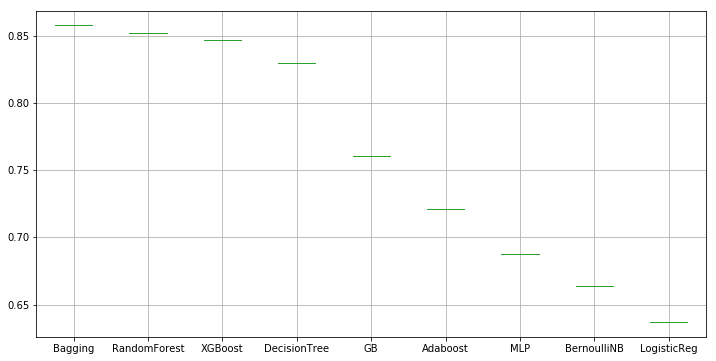

INFO:root:Best Model Based on CV: Bagging with accuracy: 0.857


In [16]:
# get models with best parameters
tunedModels = mc.getTunedModels()    

# cross validate models
cv_res = mc.crossValidateModels(tunedModels, X_train, y_train)


In [19]:
# save tuned models to Models directory

models = mc.getTunedModels()
mc.saveModels(models, '../Models/', X_train, y_train)    # getModelResults function uses this model files


Now, I've determined the best performing models, and the best performing model is Bagging based on cross-validation scores. So I will apply Bagging to the test data.

INFO:root:Getting Bagging model results on test data: 
INFO:root:Bagging Accuracy of model 0.769209197980931: 
INFO:root:Bagging ROC Accuracy of model 0.577022972090126: 
INFO:root:Bagging F1 Score of model 0.7498920547289973: 


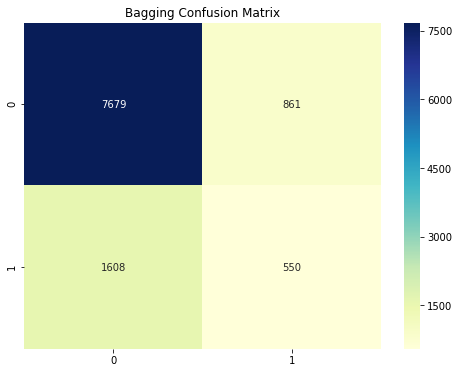

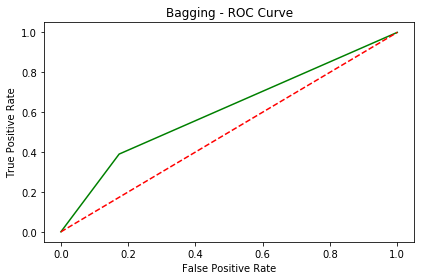

Bagging - Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8540
           1       0.39      0.25      0.31      2158

   micro avg       0.77      0.77      0.77     10698
   macro avg       0.61      0.58      0.58     10698
weighted avg       0.74      0.77      0.75     10698



In [20]:
best_model = cv_res[0][0] 
mf.getModelResults(best_model, X_test, y_test) # Get best performing model's result on test data


In [22]:
# get best 3 models based on cross validation score

best3scorer = [(l[0], l[2]) for l in cv_res[:3]]
best3scorer

[('Bagging', BaggingClassifier(base_estimator=None, bootstrap=True,
           bootstrap_features=False, max_features=1.0, max_samples=1.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
           verbose=0, warm_start=False)),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=50, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('XGBoost',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_delta_step=0,
         max_depth=5, min_child_weight=3, missing=None, n_estimators=300,
         n_jobs=1, nthread=None, objective='binary

In [23]:
# get ensemble model results using best 3 models 

mc.ensembleModel(X, y, best3scorer)    # Soft Vote or weighted probabilities

The cross validated score is 0.7779411227151268


VotingClassifier(estimators=[('Bagging', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)), ('RandomForest', RandomForestClassif...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

The ensemble model score is not good as the best scorer model (Bagging). Therefore I will use Bagging model as a final model.

##  After Dimentionality Reduction with PCA

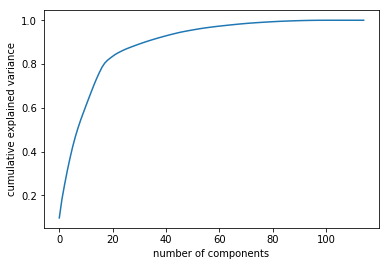

In [9]:
dp.choosePCAComponentNum(X_train)

Based on the graph I will use 40 as the number of components.

In [5]:
print("Shape of Data After PCA: (%s, %s)" % X_train.shape)

Shape of Data After PCA: (153518, 40)


INFO:root:BernoulliNB Accuracy of model 0.5870581951302127: 
INFO:root:BernoulliNB ROC Accuracy of model 0.5870581951302127: 
INFO:root:BernoulliNB F1 Score of model 0.5869866881923358: 


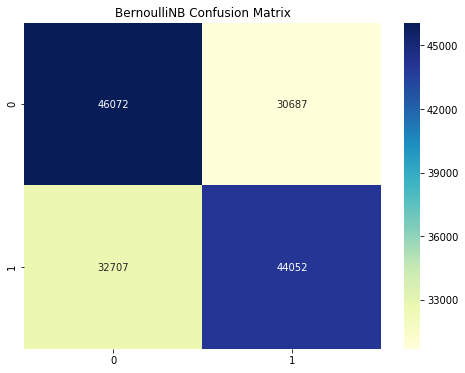

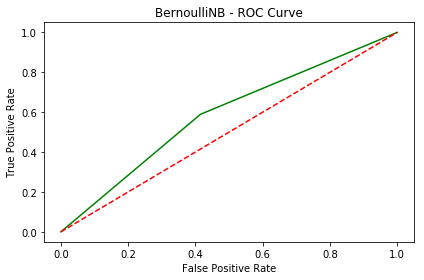

BernoulliNB - Classification Report 

              precision    recall  f1-score   support

           0       0.58      0.60      0.59     76759
           1       0.59      0.57      0.58     76759

   micro avg       0.59      0.59      0.59    153518
   macro avg       0.59      0.59      0.59    153518
weighted avg       0.59      0.59      0.59    153518



INFO:root:LogisticReg Accuracy of model 0.5963144386977423: 
INFO:root:LogisticReg ROC Accuracy of model 0.5963144386977424: 
INFO:root:LogisticReg F1 Score of model 0.5961708314982164: 


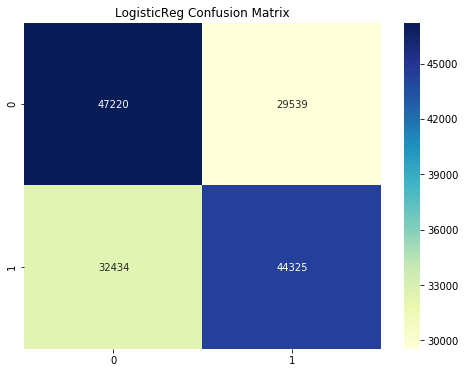

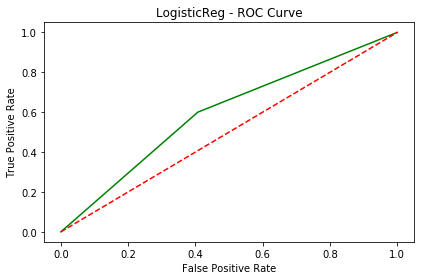

LogisticReg - Classification Report 

              precision    recall  f1-score   support

           0       0.59      0.62      0.60     76759
           1       0.60      0.58      0.59     76759

   micro avg       0.60      0.60      0.60    153518
   macro avg       0.60      0.60      0.60    153518
weighted avg       0.60      0.60      0.60    153518



INFO:root:RandomForest Accuracy of model 0.8192915488737477: 
INFO:root:RandomForest ROC Accuracy of model 0.8192915488737477: 
INFO:root:RandomForest F1 Score of model 0.8191964941800968: 


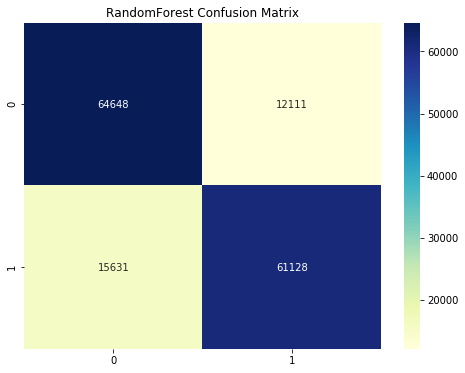

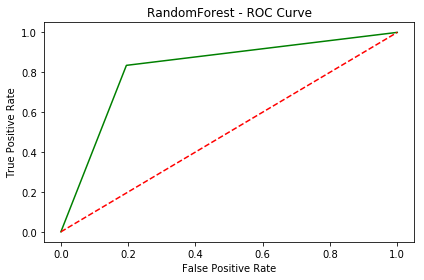

RandomForest - Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     76759
           1       0.83      0.80      0.82     76759

   micro avg       0.82      0.82      0.82    153518
   macro avg       0.82      0.82      0.82    153518
weighted avg       0.82      0.82      0.82    153518



INFO:root:XGBoost Accuracy of model 0.7147696035644029: 
INFO:root:XGBoost ROC Accuracy of model 0.7147696035644029: 
INFO:root:XGBoost F1 Score of model 0.7145874783716861: 


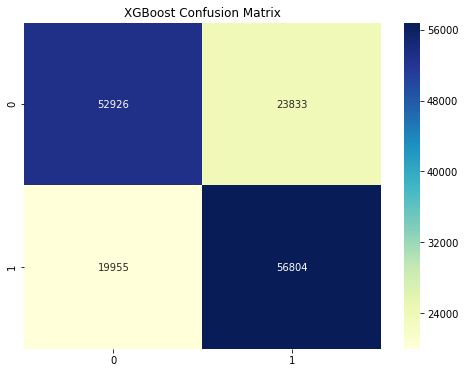

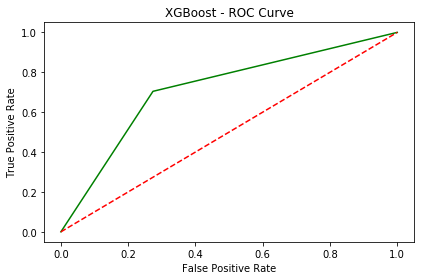

XGBoost - Classification Report 

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     76759
           1       0.70      0.74      0.72     76759

   micro avg       0.71      0.71      0.71    153518
   macro avg       0.72      0.71      0.71    153518
weighted avg       0.72      0.71      0.71    153518



INFO:root:MLP Accuracy of model 0.657382196224547: 
INFO:root:MLP ROC Accuracy of model 0.657382196224547: 
INFO:root:MLP F1 Score of model 0.6537319984237219: 


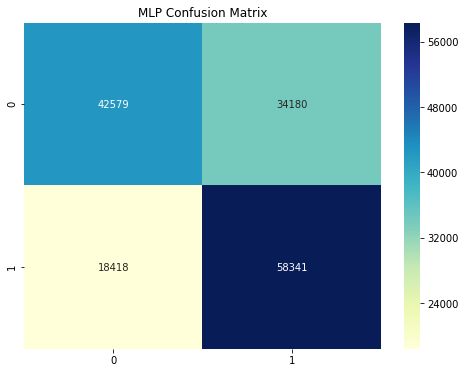

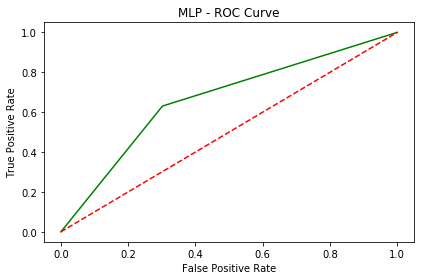

MLP - Classification Report 

              precision    recall  f1-score   support

           0       0.70      0.55      0.62     76759
           1       0.63      0.76      0.69     76759

   micro avg       0.66      0.66      0.66    153518
   macro avg       0.66      0.66      0.65    153518
weighted avg       0.66      0.66      0.65    153518



INFO:root:Adaboost Accuracy of model 0.692713558019255: 
INFO:root:Adaboost ROC Accuracy of model 0.692713558019255: 
INFO:root:Adaboost F1 Score of model 0.692664882810415: 


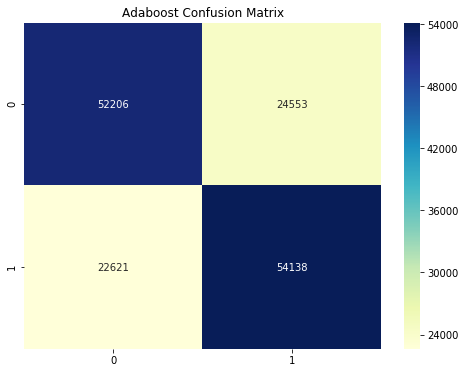

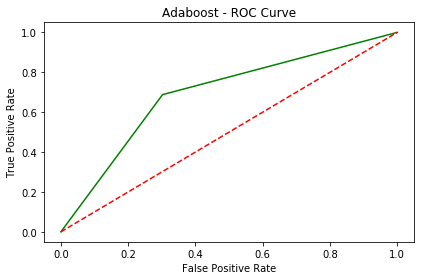

Adaboost - Classification Report 

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     76759
           1       0.69      0.71      0.70     76759

   micro avg       0.69      0.69      0.69    153518
   macro avg       0.69      0.69      0.69    153518
weighted avg       0.69      0.69      0.69    153518



INFO:root:Bagging Accuracy of model 0.8206920361130291: 
INFO:root:Bagging ROC Accuracy of model 0.8206920361130291: 
INFO:root:Bagging F1 Score of model 0.8205825114688723: 


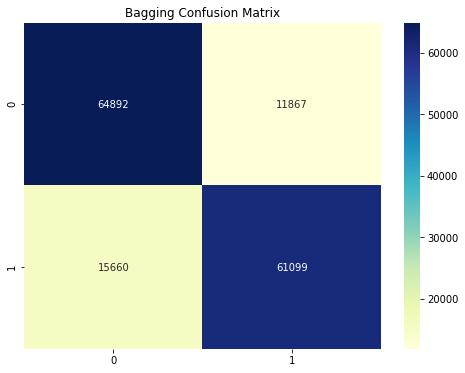

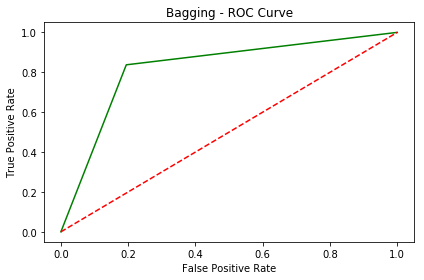

Bagging - Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     76759
           1       0.84      0.80      0.82     76759

   micro avg       0.82      0.82      0.82    153518
   macro avg       0.82      0.82      0.82    153518
weighted avg       0.82      0.82      0.82    153518



INFO:root:GB Accuracy of model 0.7155642986490184: 
INFO:root:GB ROC Accuracy of model 0.7155642986490184: 
INFO:root:GB F1 Score of model 0.7153731871761504: 


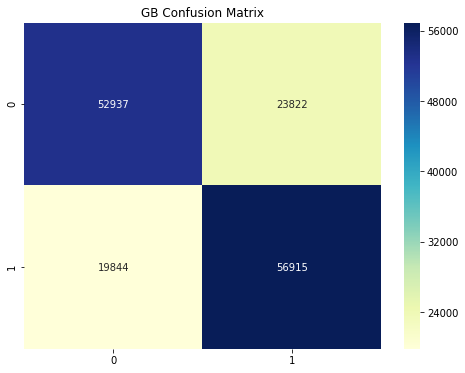

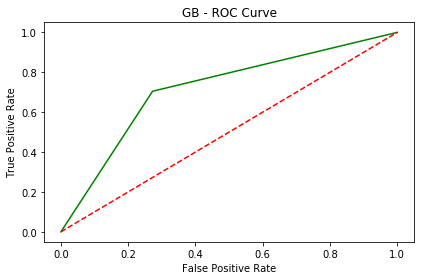

GB - Classification Report 

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     76759
           1       0.70      0.74      0.72     76759

   micro avg       0.72      0.72      0.72    153518
   macro avg       0.72      0.72      0.72    153518
weighted avg       0.72      0.72      0.72    153518



INFO:root:DecisionTree Accuracy of model 0.7848591044698342: 
INFO:root:DecisionTree ROC Accuracy of model 0.7848591044698342: 
INFO:root:DecisionTree F1 Score of model 0.7848508655892908: 


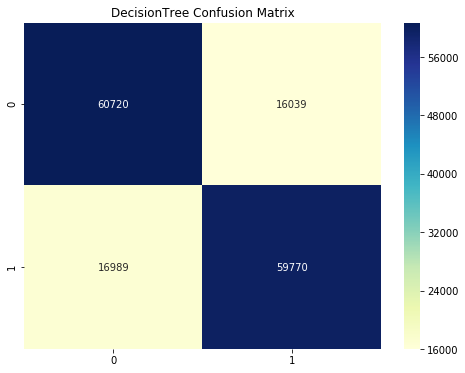

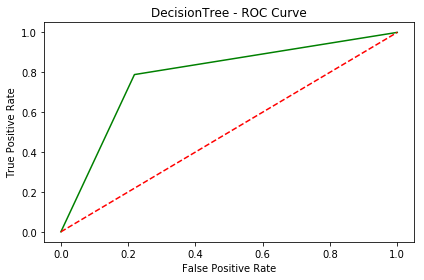

DecisionTree - Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     76759
           1       0.79      0.78      0.78     76759

   micro avg       0.78      0.78      0.78    153518
   macro avg       0.78      0.78      0.78    153518
weighted avg       0.78      0.78      0.78    153518



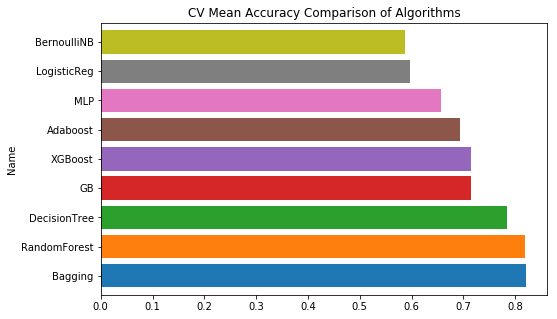

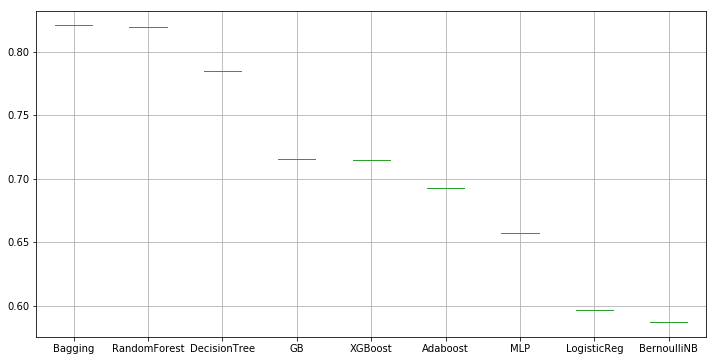

INFO:root:Best Model Based on CV: Bagging with accuracy: 0.821


In [6]:
tunedModels = mc.getTunedModels()    
cv_res = mc.crossValidateModels(tunedModels, X_train, y_train)

The best model result (0.821) is not better than the previous result (result of oversampling section - Bagging model with 0.857). So I will not use dimentionality reduction as final decision and I will use the Bagging model without PCA as my final model.